<a href="https://colab.research.google.com/github/Riddars/ITMO_Project_Cytotoxic/blob/%D0%A1%D0%BE%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8/lazypredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install lazypredict
import lazypredict
import pandas as pd

In [2]:
FullDf = pd.read_csv('/content/DF_with_actual_Decriptors.csv', encoding='ISO-8859-1')


In [6]:
FullDf.head()

,Cell type,test,material,time (hr),concentration (ug/ml),viability (%),Hydrodynamic diameter (nm),Zeta potential (mV),CID,Canonical Smiles,...,hallKierAlpha,kappa1,kappa2,kappa3,Phi,organism,morphology,tissue,disease,BSL
0,0,9,1,4,200.00,36.13,24.60,-4.65,23985,9,...,0.74,1.74,0.09,2.14,0.16,0,7,4,9,1
1,0,9,1,4,400.00,22.25,24.60,-33.33,23985,9,...,0.74,1.74,0.09,2.14,0.16,0,7,4,9,1
2,0,9,1,4,500.00,19.64,24.60,-31.30,23985,9,...,0.74,1.74,0.09,2.14,0.16,0,7,4,9,1
3,0,9,1,72,1.00,91.26,24.60,-16.95,23985,9,...,0.74,1.74,0.09,2.14,0.16,0,7,4,9,1
4,0,9,1,72,3.00,87.50,24.60,29.45,23985,9,...,0.74,1.74,0.09,2.14,0.16,0,7,4,9,1


100%|██████████| 42/42 [00:16<00:00,  2.52it/s]


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 883
[LightGBM] [Info] Number of data points in the train set: 2371, number of used features: 33
[LightGBM] [Info] Start training from score 75.303022
                               Adjusted R-Squared     R-Squared      RMSE  \
Model                                                                       
XGBRegressor                                 0.72          0.74     15.34   
HistGradientBoostingRegressor                0.68          0.70     16.52   
LGBMRegressor                                0.68          0.70     16.54   
RandomForestRegressor                        0.67          0.69     16.71   
BaggingRegressor                             0.66          0.68     17.08   
ExtraTreesRegressor                          0.64    

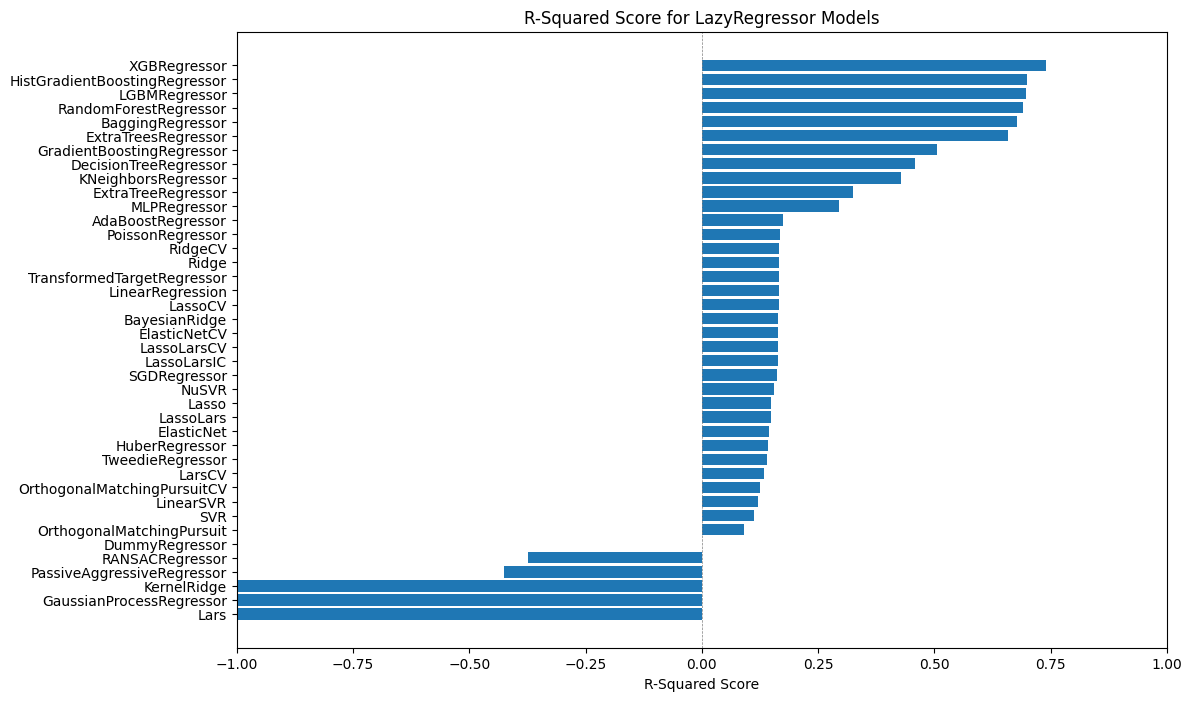

In [17]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
import matplotlib.pyplot as plt

# Разделение на признаки и целевую переменную
X = FullDf.drop('viability (%)', axis=1)
y = FullDf['viability (%)']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение моделей регрессии
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Вывод результатов
print(models)

# Построение более наглядного графика
plt.figure(figsize=(12, 8))
plt.barh(models.index, models['R-Squared'])
plt.xlabel('R-Squared Score')
plt.title('R-Squared Score for LazyRegressor Models')
plt.axvline(x=0.0, color='gray', linestyle='--', linewidth=0.5)  # Добавление вертикальной линии на 0
plt.xlim(-1.0, 1.0)  # Установка пределов для x-оси
plt.gca().invert_yaxis()
plt.show()